In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, losses, metrics

In [11]:
EPOCHS = 300

In [3]:
def create_dataset(N, start=0, end=20, duration=3, step=50):
    x_start = np.random.rand(N) * (end - start - duration) + start
    x_end = x_start + duration
    
    xs = np.zeros((N, step, 1))

    for i in range(N):
        x = np.linspace(x_start[i], x_end[i], step)
        xs[i] = np.expand_dims(np.sin(x*np.pi), axis=-1)

    return xs

In [4]:
data = create_dataset(3000)

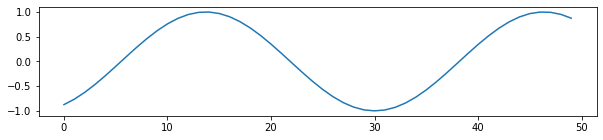

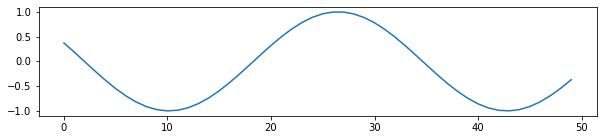

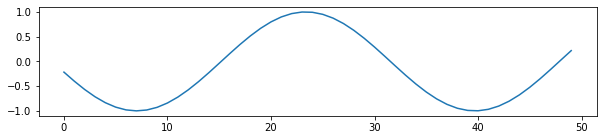

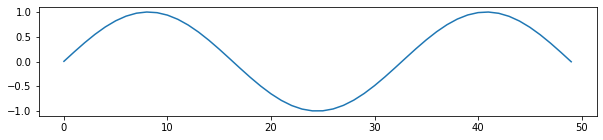

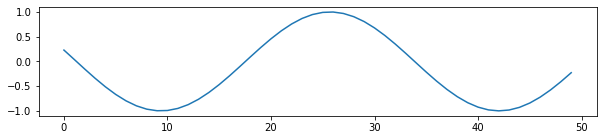

In [33]:
for i in range(data.shape[0]):
    plt.figure(figsize=(10, 2))
    plt.plot(data[i].squeeze())
    plt.show()
    if i == 4:
        break

In [28]:
model = models.Sequential([
    layers.GRU(16, return_sequences=True),
    layers.Dense(1, activation=tf.nn.tanh)
])

In [29]:
optimizer = optimizers.Adam(learning_rate=1e-2)
criterion = losses.MeanAbsoluteError()
metric = metrics.Mean()

In [30]:
def train_step(x, y):
    
    with tf.GradientTape() as tape:
        y_pred = model(x, training=True)
        loss = criterion(y, y_pred)
        
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    metric.update_state(loss)

In [31]:
def train():
    
    for e in range(EPOCHS):
        dataset = create_dataset(512)
        
        x = dataset[:, :-1]
        x = tf.convert_to_tensor(x, dtype=tf.float32)
        y = dataset[:, 1:]
        y = tf.convert_to_tensor(y, dtype=tf.float32)
        
        train_step(x, y)
        train_loss = metric.result()
        
        if e == 0 or (e+1)%30 == 0:
            print(f"Epochs {e+1}/{EPOCHS}")
            print(f"Train loss: {train_loss:.6f}")
        
        metric.reset_states()

In [32]:
train()

Epochs 1/300
Train loss: 0.799862
Epochs 30/300
Train loss: 0.094536
Epochs 60/300
Train loss: 0.067811
Epochs 90/300
Train loss: 0.046392
Epochs 120/300
Train loss: 0.033535
Epochs 150/300
Train loss: 0.024642
Epochs 180/300
Train loss: 0.033150
Epochs 210/300
Train loss: 0.026016
Epochs 240/300
Train loss: 0.023282
Epochs 270/300
Train loss: 0.022204
Epochs 300/300
Train loss: 0.021849


In [41]:
def predict():
    r = np.random.randint(0, 10)
    x = np.linspace(r, r + 3, 50)
    x = np.sin(x * np.pi)
    x = tf.convert_to_tensor(x, dtype=tf.float32)
    
    y_pred = model(tf.reshape(x, shape=(1, 50, 1)), training=False)
    y_pred = y_pred.numpy()
    
    plt.figure(figsize=(10, 2))
    plt.plot(x.numpy()[1:], label="x")
    plt.plot(y_pred.squeeze()[:-1], label="pred")
    plt.legend()
    plt.plot()

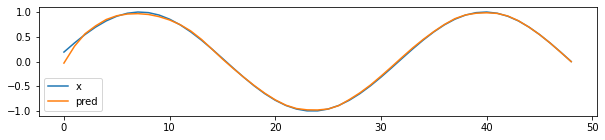

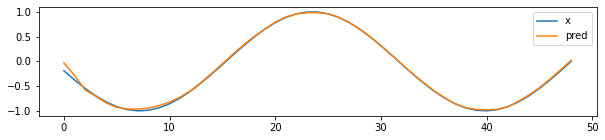

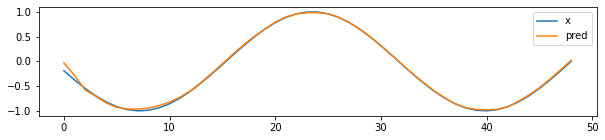

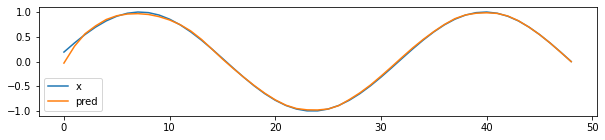

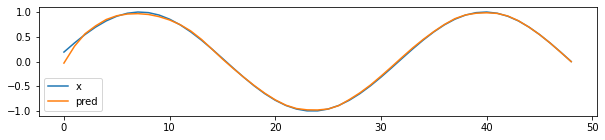

In [42]:
for i in range(5):
    predict()